In [1]:
import pandas as pd
import numpy as np
from math import log,sqrt
import matplotlib.pyplot as plt
from scipy.stats import norm

In [2]:
columns = ["feat1","feat2","target"]

In [3]:
df = pd.read_csv("a1_d1.csv", sep=',', header=None,
                     names=columns)
df.head(n=5)

,feat1,feat2,target
0,-0.598283,1.023534,1
1,1.115929,0.512127,1
2,1.169815,-1.072747,0
3,0.631926,-0.255663,0
4,0.052532,1.198445,1


In [4]:
df.describe()

,feat1,feat2,target
count,1000.000000,1000.000000,1000.00000
mean,0.002286,-0.009235,0.50000
std,0.968491,1.072901,0.50025
min,-3.276132,-2.002524,0.00000
25%,-0.674982,-1.014600,0.00000
50%,-0.029045,-0.183023,0.50000
75%,0.644312,0.978624,1.00000
max,3.745272,2.554851,1.00000


In [5]:
pospoints =  []
negpoints = []
for i in range(len(df)):
    if(df.iloc[i][2]==1):
        pospoints.append([df.iloc[i][0],df.iloc[i][1]])
    else:
        negpoints.append([df.iloc[i][0],df.iloc[i][1]])
pospoints = np.array(pospoints)
negpoints = np.array(negpoints)

In [6]:
m1 = pospoints[0]
for i in range(1,len(pospoints)):
    m1 = np.add(m1,pospoints[i])
m2 = negpoints[0]
for i in range(1,len(negpoints)):
    m2 = np.add(m2,negpoints[i])
m1 = m1/len(pospoints)
m2 = m2/len(pospoints)
print(m1)
print(m2)
print(m1-m2)

[0.03235729 0.98284059]
[-0.02778514 -1.00130985]
[0.06014243 1.98415045]


In [7]:
covpos = (pospoints-m1).T@(pospoints-m1)
covpos = covpos/len(pospoints)
covneg = (negpoints-m2).T@(negpoints-m2)
covneg = covneg/len(negpoints)
print(covpos)
print(covneg)
cov=covpos+covneg
print(cov)
cov_inv = np.linalg.inv(cov)
print(cov_inv)

[[ 0.95120983 -0.0473321 ]
 [-0.0473321   0.22204043]]
[[ 0.92105428 -0.00457688]
 [-0.00457688  0.1094645 ]]
[[ 1.87226411 -0.05190898]
 [-0.05190898  0.33150494]]
[[0.53644158 0.08399916]
 [0.08399916 3.02969942]]


In [8]:
w = cov_inv@(m1-m2)
w

array([0.19892987, 6.01643137])

In [9]:
trans_pospoints = [w.T@pospoint for pospoint in pospoints]
trans_pospoints = sorted(trans_pospoints)
print("pospoints:",trans_pospoints)
print("\n")
print("\n")
print("\n")
print("\n")
trans_negpoints = [w.T@negpoint for negpoint in negpoints]
trans_negpoints = sorted(trans_negpoints)
print("negpoints:",trans_negpoints)

pospoints: [-4.363548701247755, -1.3374986534610216, -1.2801030159250235, -1.013379081424919, -0.6581437304922156, -0.5052033062069154, -0.47863868887366307, -0.29636873610163944, -0.2450636008727321, 0.053498725928705554, 0.060134310954259446, 0.16120452429767593, 0.2448630630398803, 0.32632628388919144, 0.4770332632107621, 0.6099477853748055, 0.6928087487003014, 0.7777401684117926, 0.8094475686357896, 0.9008268304840656, 0.9043771788301913, 0.9706424079909635, 1.0283446732800448, 1.1767129079371963, 1.195622519584449, 1.198262191214421, 1.299828062453805, 1.3776995094609865, 1.4839710822064471, 1.5541208341281394, 1.6022357564088943, 1.6088126834423808, 1.7124503995953826, 1.720999362856164, 1.7931243102164511, 1.8219316320524557, 1.834221990381669, 1.8844098280416266, 2.005425281617476, 2.016157699191294, 2.0292044628812906, 2.0449269565713943, 2.102284521664671, 2.1096317425428284, 2.133093144071491, 2.1358882699004598, 2.2004063030935885, 2.253592790285935, 2.267928452558144, 2.28

In [10]:
pos_mean = np.mean(trans_pospoints)
neg_mean = np.mean(trans_negpoints)
print(pos_mean, neg_mean)

5.919629804136734 -6.0298393095658795


In [11]:
pos_std = np.std(trans_pospoints)
neg_std = np.std(trans_negpoints)
print(pos_std, neg_std)

2.8216378768166286 1.996954883270117


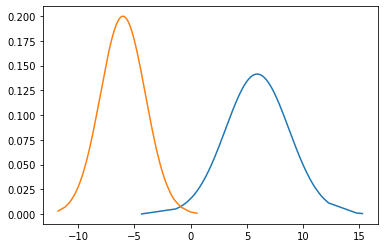

In [12]:
plt.plot(trans_pospoints,norm.pdf(trans_pospoints,pos_mean,pos_std))
plt.plot(trans_negpoints,norm.pdf(trans_negpoints,neg_mean,neg_std))
plt.show()

In [13]:
a = pos_std**2 - neg_std**2
b = -2*((pos_std**2)*neg_mean - (neg_std**2)*pos_mean)
c = (pos_std**2)*(neg_mean**2) - (neg_std**2)*(pos_mean**2) - 2*(pos_std**2)*(neg_std**2)*log(pos_std/neg_std)
print(a,b,c)

3.973811502069885 143.22776389964457 127.7840764655288


In [14]:
point1 = (-b+sqrt(b**2-4*a*c))/(2*a)
point2 = (-b-sqrt(b**2-4*a*c))/(2*a)
print(point1, point2)

-0.9154240171714463 -35.12749443153702


In [15]:
if(abs((pos_mean+neg_mean)/2-point1) < abs((pos_mean+neg_mean)/2-point2)):
    cutpoint = point1
else:
    cutpoint = point2
cutpoint

-0.9154240171714463

In [16]:
a=0
b=0
c=0
d=0
for testpoint in pospoints:
    if(w.T@testpoint>=cutpoint):
        a=a+1
    else:
        b=b+1
for testpoint in negpoints:
    if(w.T@testpoint<cutpoint):
        c=c+1
    else:
        d=d+1
print(a,b,c,d)

496 4 497 3


In [17]:
accuracy = (a+c)/(a+b+c+d)
print("accuracy:", accuracy)

accuracy: 0.993


In [18]:
precision = a/(a+d)
recall = a/(a+b)
f_score = 2 * precision * recall / (precision + recall)
print("f_score:", f_score)

f_score: 0.9929929929929929


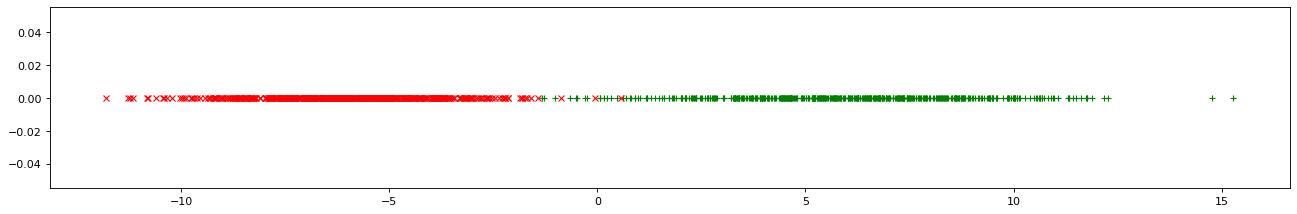

In [19]:
plt.figure(num=None, figsize=(20, 3), dpi=80, facecolor='w', edgecolor='k')
ar = np.array(trans_pospoints) # just as an example array
ar2 = np.array(trans_negpoints)
plt.plot(ar, np.zeros_like(ar) , 'g+')
plt.plot(ar2, np.zeros_like(ar2) , 'rx')
plt.show()